In [28]:
import os
import json
from PIL import Image

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
with open('all_boxes.json', 'r') as file:
    all_boxes = json.load(file)

In [3]:
input_dir = "BCCD/JPEGImages"
output_WBC_dir = "dataset/WBC"
output_RBC_dir = "dataset/RBC"
output_Platelets_dir = "dataset/Platelets"

os.makedirs(output_WBC_dir, exist_ok=True)
os.makedirs(output_RBC_dir, exist_ok=True)
os.makedirs(output_Platelets_dir, exist_ok=True)

In [4]:
def crop_image(bbox_data, output_dir, type):
    for i, obj in enumerate(bbox_data):
        filename = obj['filename']
        xmin = obj['xmin']
        xmax = obj['xmax']
        ymin = obj['ymin']
        ymax = obj['ymax']
        
        input_path = os.path.join(input_dir, filename)
        if not os.path.exists(input_path):
            print(f"Imagem {input_path} não encontrada, pulando...")
            continue
        
        with Image.open(input_path) as img:
            cropped_img = img.crop((xmin, ymin, xmax, ymax))
            
            resized_img = cropped_img.resize((36, 36))
            
            output_filename = f"{type}_{i}.jpg"
            output_path = os.path.join(output_dir, output_filename)
            
            resized_img.save(output_path, format="JPEG")

In [5]:
crop_image(all_boxes['WBC'], output_WBC_dir, 'WBC')
crop_image(all_boxes['RBC'], output_RBC_dir, 'RBC')
crop_image(all_boxes['Platelets'], output_Platelets_dir, 'Platelets')

In [17]:
inputs = []
targets = []

def load_images_from_directory(directory, label):
    for file_name in os.listdir(directory):
        if file_name.lower().endswith(('.jpg')):
            file_path = os.path.join(directory, file_name).replace('\\', '/')
            inputs.append(file_path)
            targets.append(label)

In [18]:
load_images_from_directory(output_WBC_dir, 0)
load_images_from_directory(output_RBC_dir, 1)
load_images_from_directory(output_Platelets_dir, 2)

In [21]:
print("Total de imagens carregadas:", len(inputs))

Total de imagens carregadas: 4880


In [23]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=6, stratify=targets)

In [24]:
train_test = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

In [40]:
with open('train_test.json', 'w') as file:
    json.dump(train_test, file)

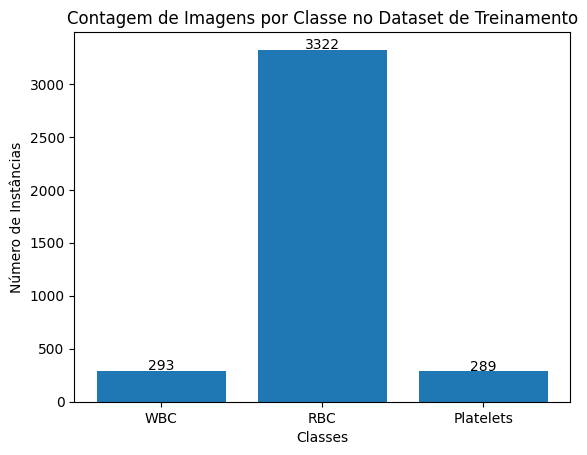

In [33]:
class_counts = [y_train.count(i) for i in range(3)]

plt.bar(['WBC', 'RBC', 'Platelets'], class_counts)
plt.xlabel('Classes')
plt.ylabel('Número de Instâncias')
plt.title('Contagem de Imagens por Classe no Dataset de Treinamento')

for i, count in enumerate(class_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

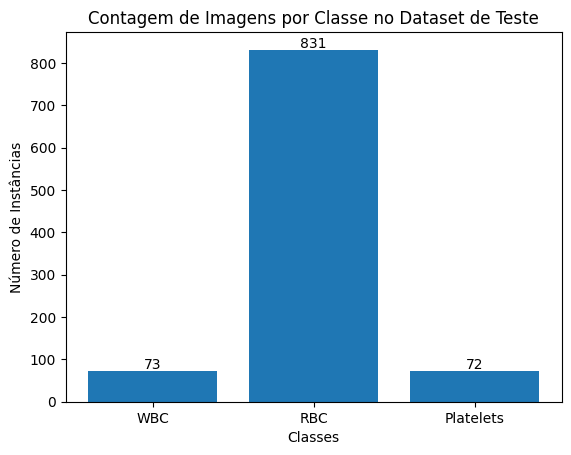

In [34]:
class_counts = [y_test.count(i) for i in range(3)]

plt.bar(['WBC', 'RBC', 'Platelets'], class_counts)
plt.xlabel('Classes')
plt.ylabel('Número de Instâncias')
plt.title('Contagem de Imagens por Classe no Dataset de Teste')

for i, count in enumerate(class_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

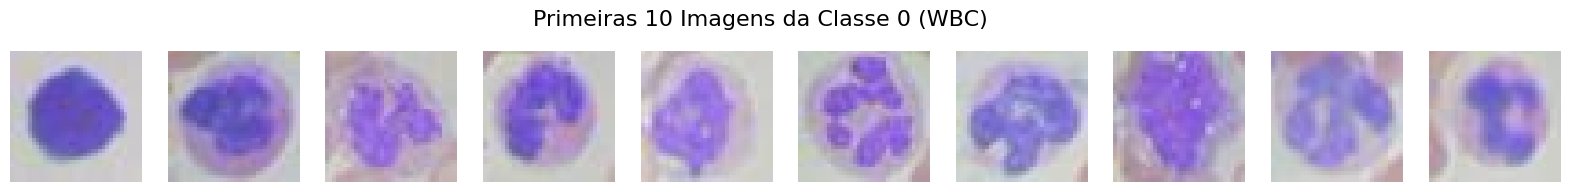

In [ ]:
class_0_images = [X_test[i] for i in range(len(y_test)) if y_test[i] == 0]

selected_images = class_0_images[:10]

fig, axes = plt.subplots(1, 10, figsize=(20, 3))
fig.suptitle('Primeiras 10 Imagens da Classe 0 (WBC)', fontsize=16, y=0.85)
for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

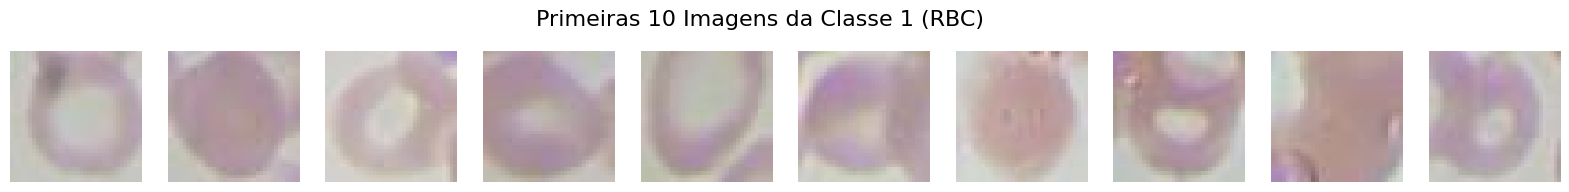

In [ ]:
class_1_images = [X_test[i] for i in range(len(y_test)) if y_test[i] == 1]

selected_images = class_1_images[:10]

fig, axes = plt.subplots(1, 10, figsize=(20, 3))
fig.suptitle('Primeiras 10 Imagens da Classe 1 (RBC)', fontsize=16, y=0.85)
for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

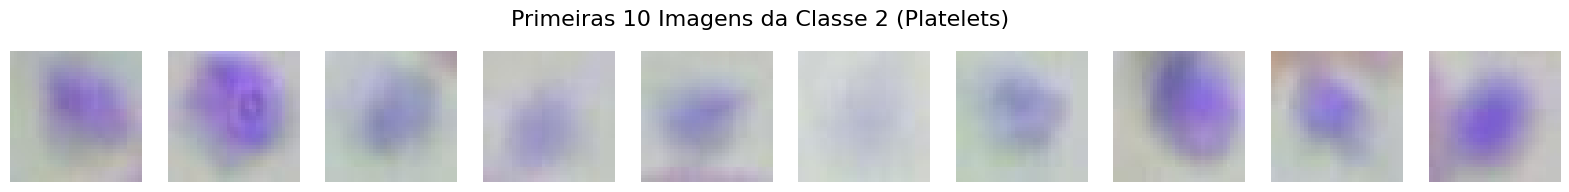

In [39]:
class_2_images = [X_test[i] for i in range(len(y_test)) if y_test[i] == 2]

selected_images = class_2_images[:10]

fig, axes = plt.subplots(1, 10, figsize=(20, 3))
fig.suptitle('Primeiras 10 Imagens da Classe 2 (Platelets)', fontsize=16, y=0.85)
for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()